# Red Wine Quality Prediction Model

# 3. Analysis of the dataset and Trained Model

### 3.1 Load dataset and packages

In [1]:
# Loading the necessary packages
import random
from seaborn.palettes import color_palette
random.seed(9001)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report,mean_squared_error, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedKFold
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
gr8_wq= pd.read_csv("gr8_wq_quality.csv",header=0)


### 3.2 Show first rows of dataset and describe the dataframe

In [2]:
# Show first 10 rows of the dataframe
gr8_wq.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  Predict_quality  
0      9.4        5                5  
1      9.8        5                5  
2      9.8        5                5  
3      9.8        6                5  
4      9.4        5                5  
5      9.4        5                5  
6      9.4        5                5  
7     10.0        7                7  
8      9.5        7                7  
9     10.5        5                5

In [3]:
# Describe dataset
gr8_wq.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  Predict_quality  
count  1599.000000  1599.000000  1599.000000  1599.000000      1599.000000  
mean      3.311113     0.658149    10.422983     5.636023         5.658537  
std       0.154386     0.169507     1.065668     0.807569         0.754445  
min       2.740000     0.330000     8.400000     3.000000         4.000000  
25%       3.210000     0.550000     9.500000     5.000000         5.000000  
50%       3.310000     0.620000    10.200000     6.000000         6.000000  
75%       3.400000     0.730000    11.100000     6.000000         6.000000  
max       4.010000     2.000000    14.900000     8.000000         8.000000

### 3.3 Create pairplot for whole dataset to observe the distributions and correlations

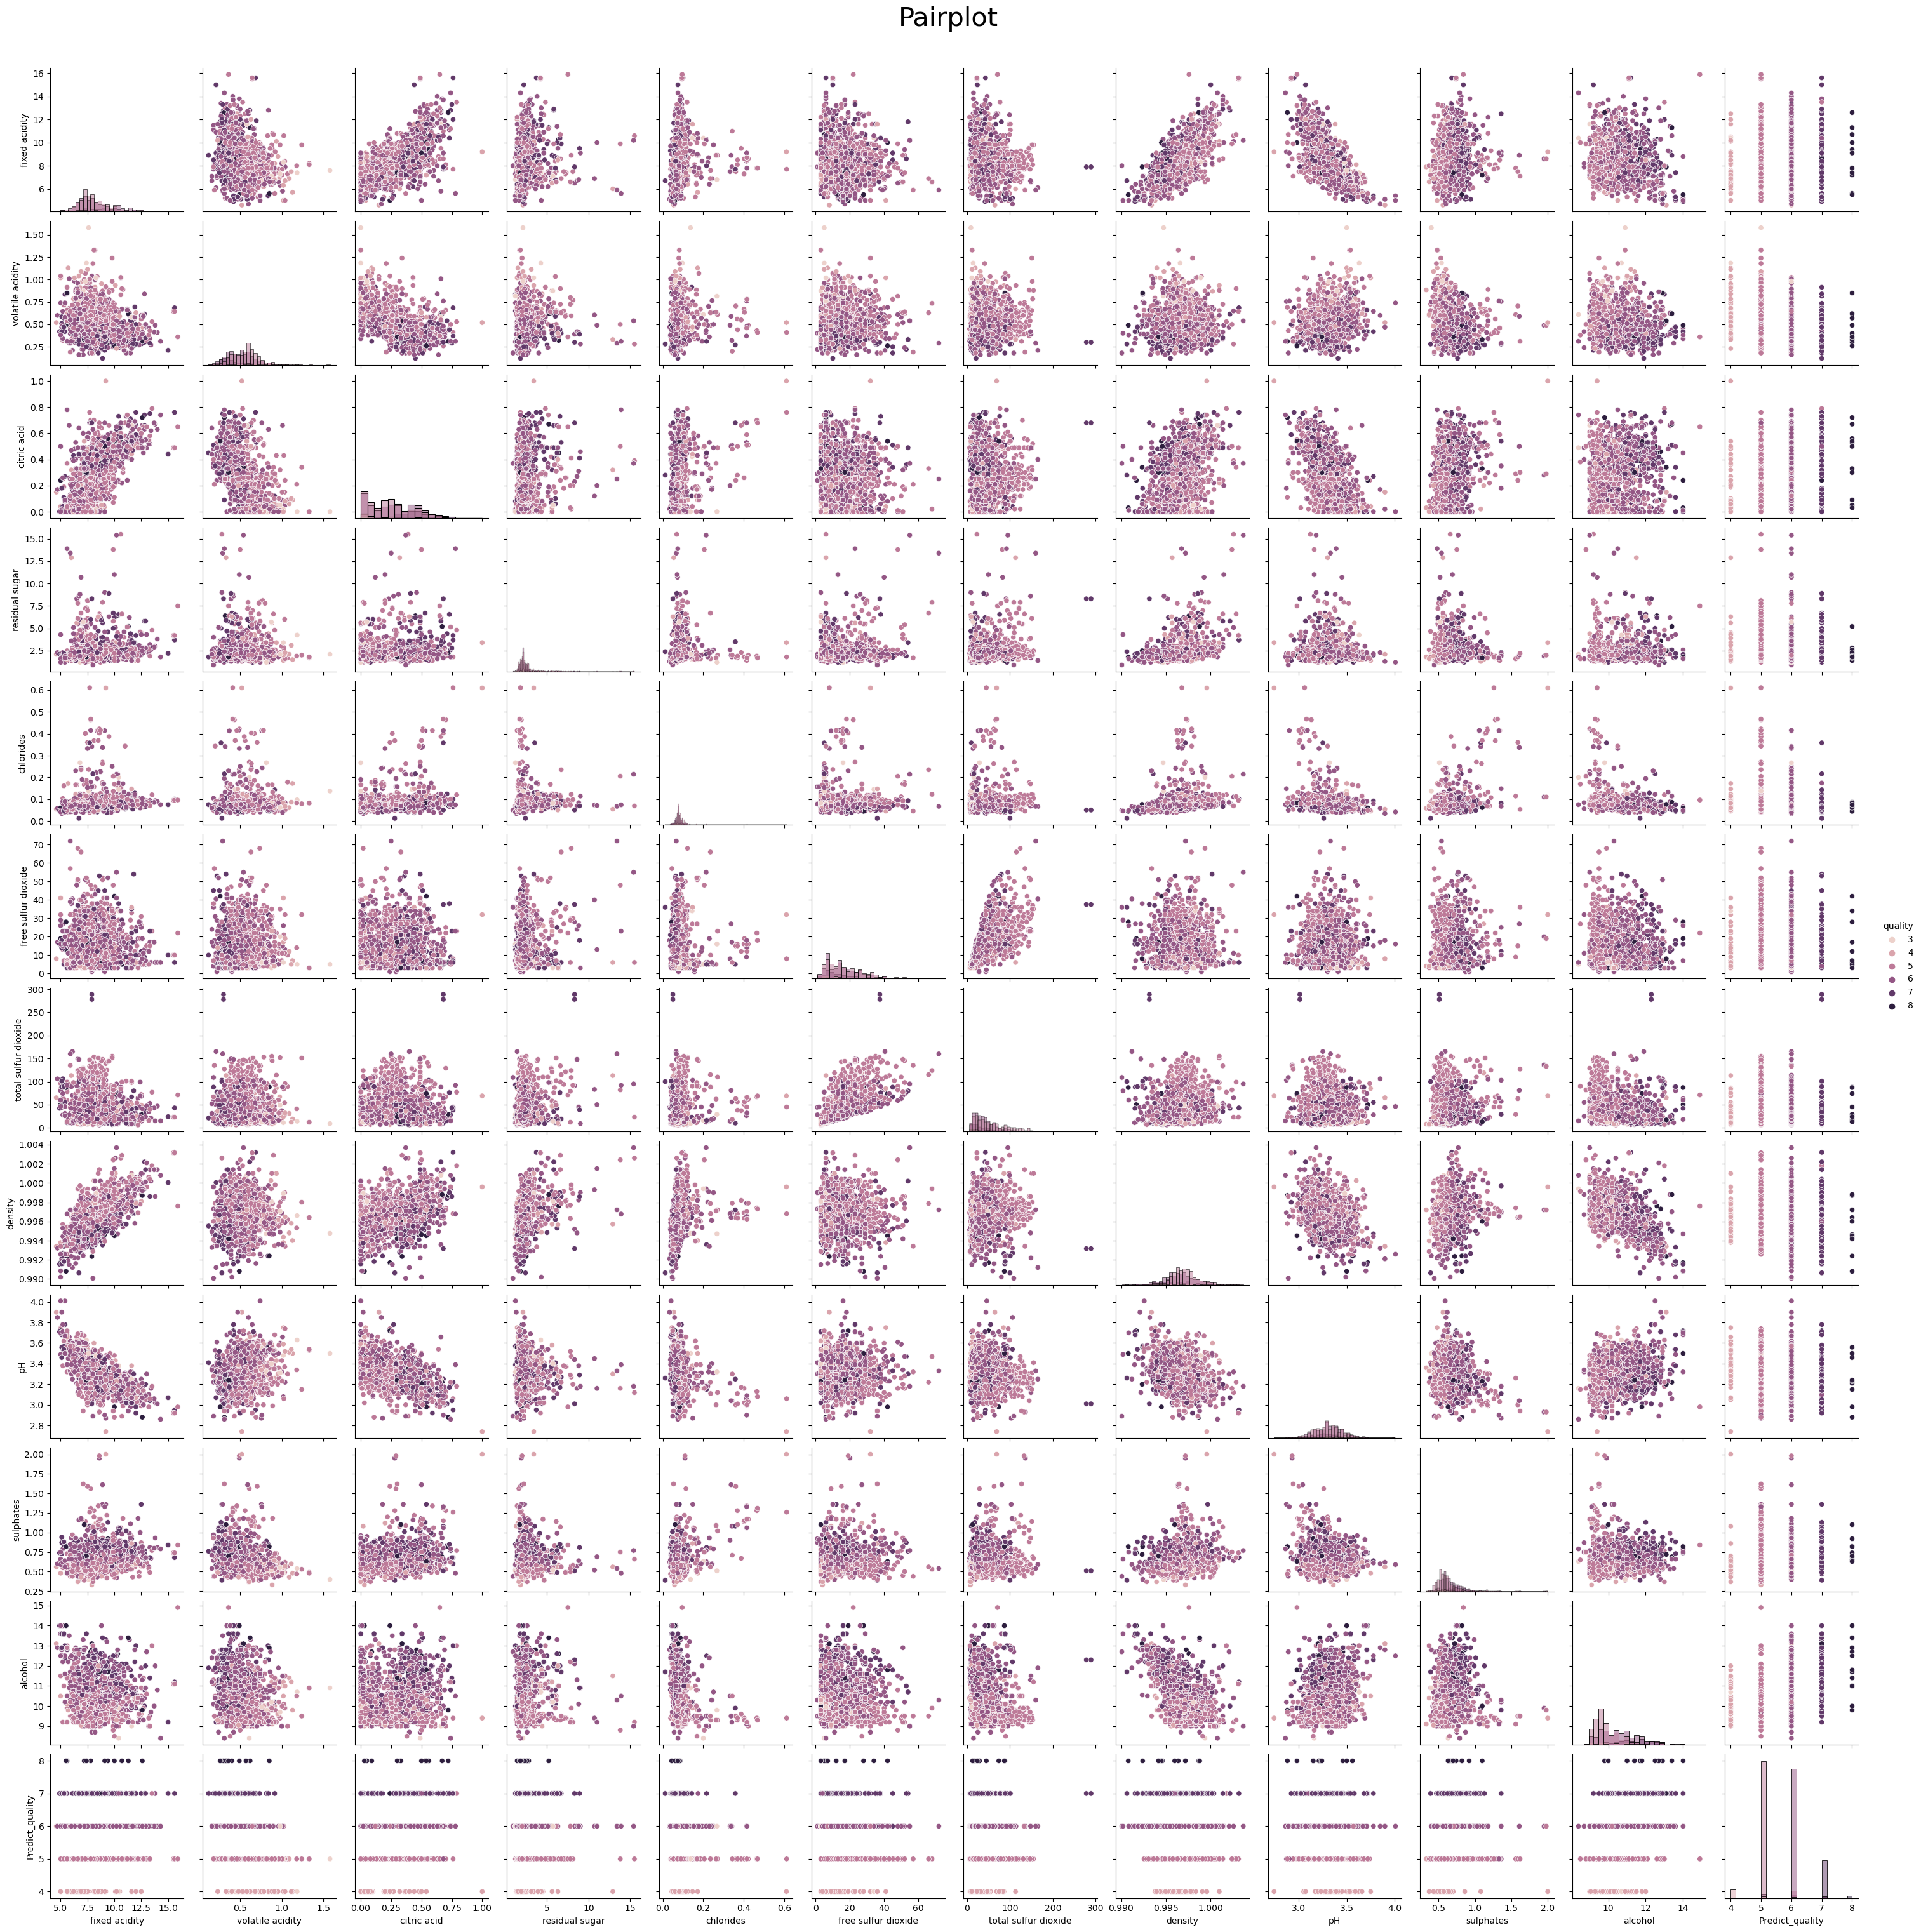

In [5]:
# create pairplot by quality
pp = sns.pairplot(gr8_wq, hue="quality",diag_kind="hist")
pp.fig.suptitle("Pairplot", fontsize=30, y=1.02);

### 3.4 Show correlations of wine features and wine quality scores

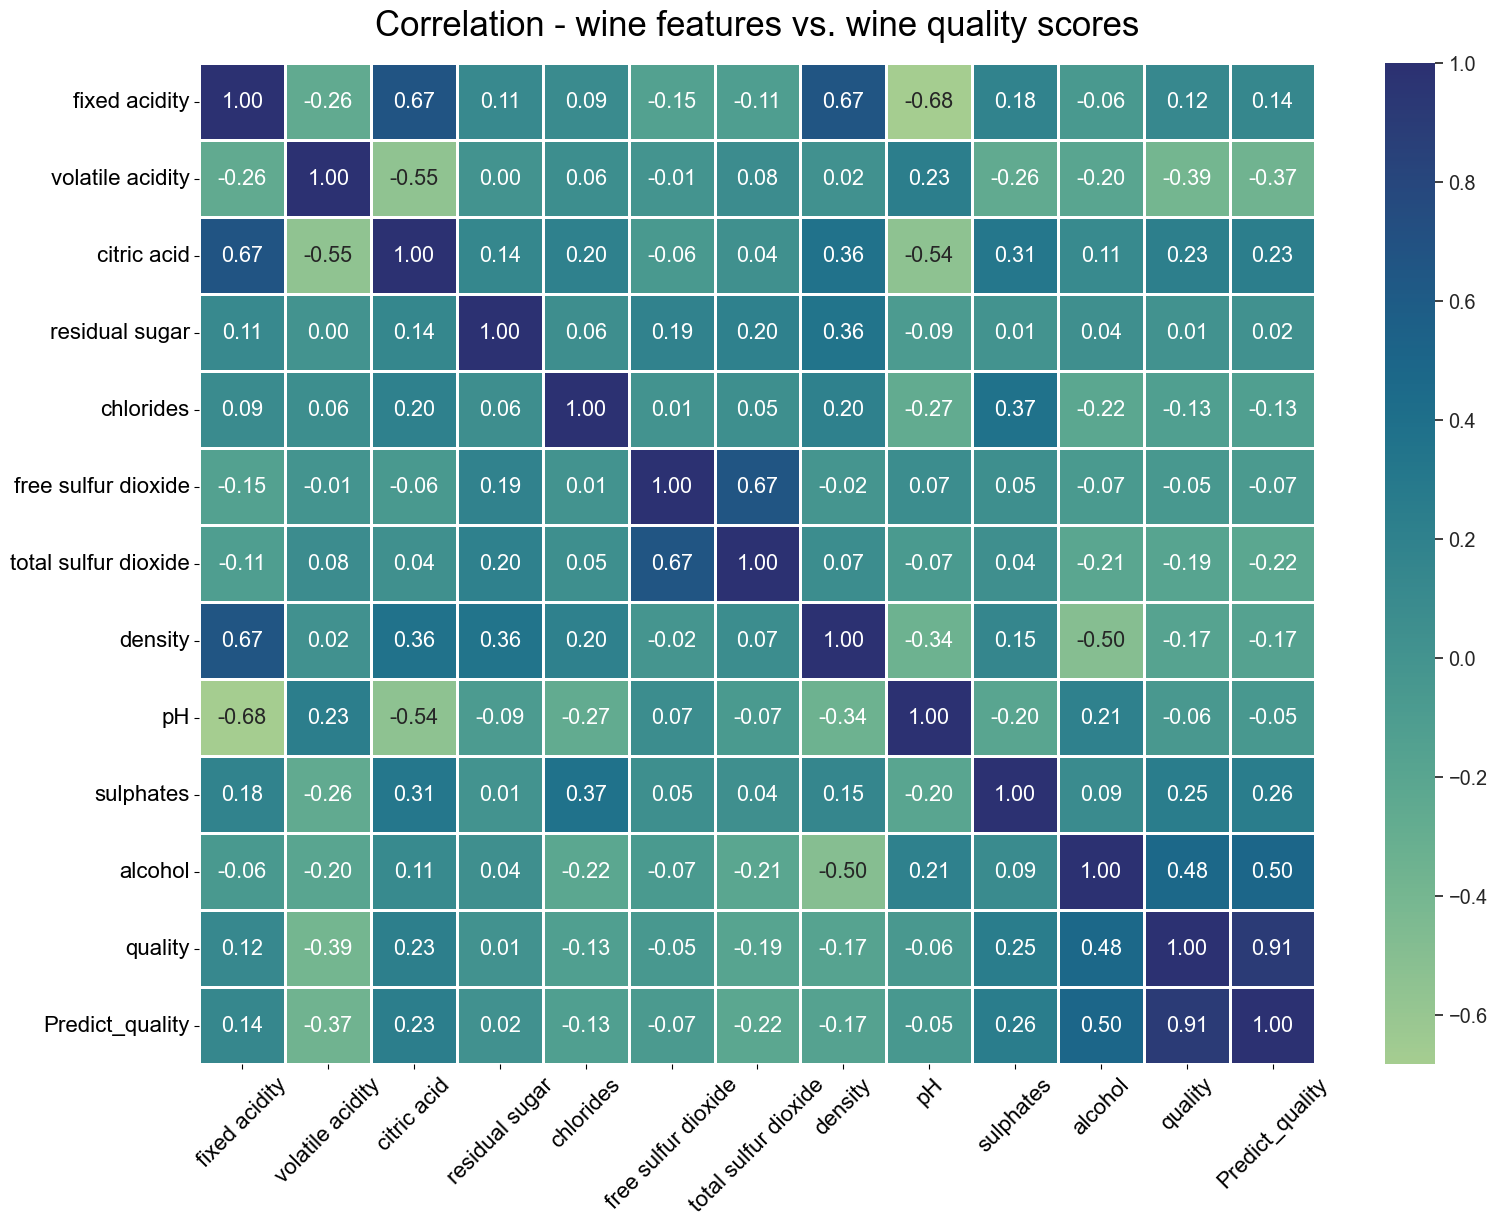

In [6]:
# plot correltion heatmap
plt.figure(figsize=(18,13))
plt.title("Correlation - wine features vs. wine quality scores", fontsize=25, pad=20)
sns.set(font_scale=1.3)
corr = sns.heatmap(gr8_wq.corr(), annot=True, fmt='.2f', linewidths=2, cmap="crest")
corr.set_yticklabels(corr.get_ymajorticklabels(), fontsize = 16);
corr.set_xticklabels(corr.get_xmajorticklabels(), fontsize = 16, rotation=45);


##### The correlation heatmap above shows that "Alcohol", "Sulphates", "Citric acid" these three features have high positive correlations with "Wine quality score"; "Volatile acidity", “Total sulfur dioxide" have the high negative correlation with "Wine quality score".

### 3.5 Graph distributions of wine features ("Alcohol", "Sulphates", "Citric acid","Volatile acidity", “Total sulfur dioxide","Chlorides") by wine quality scores

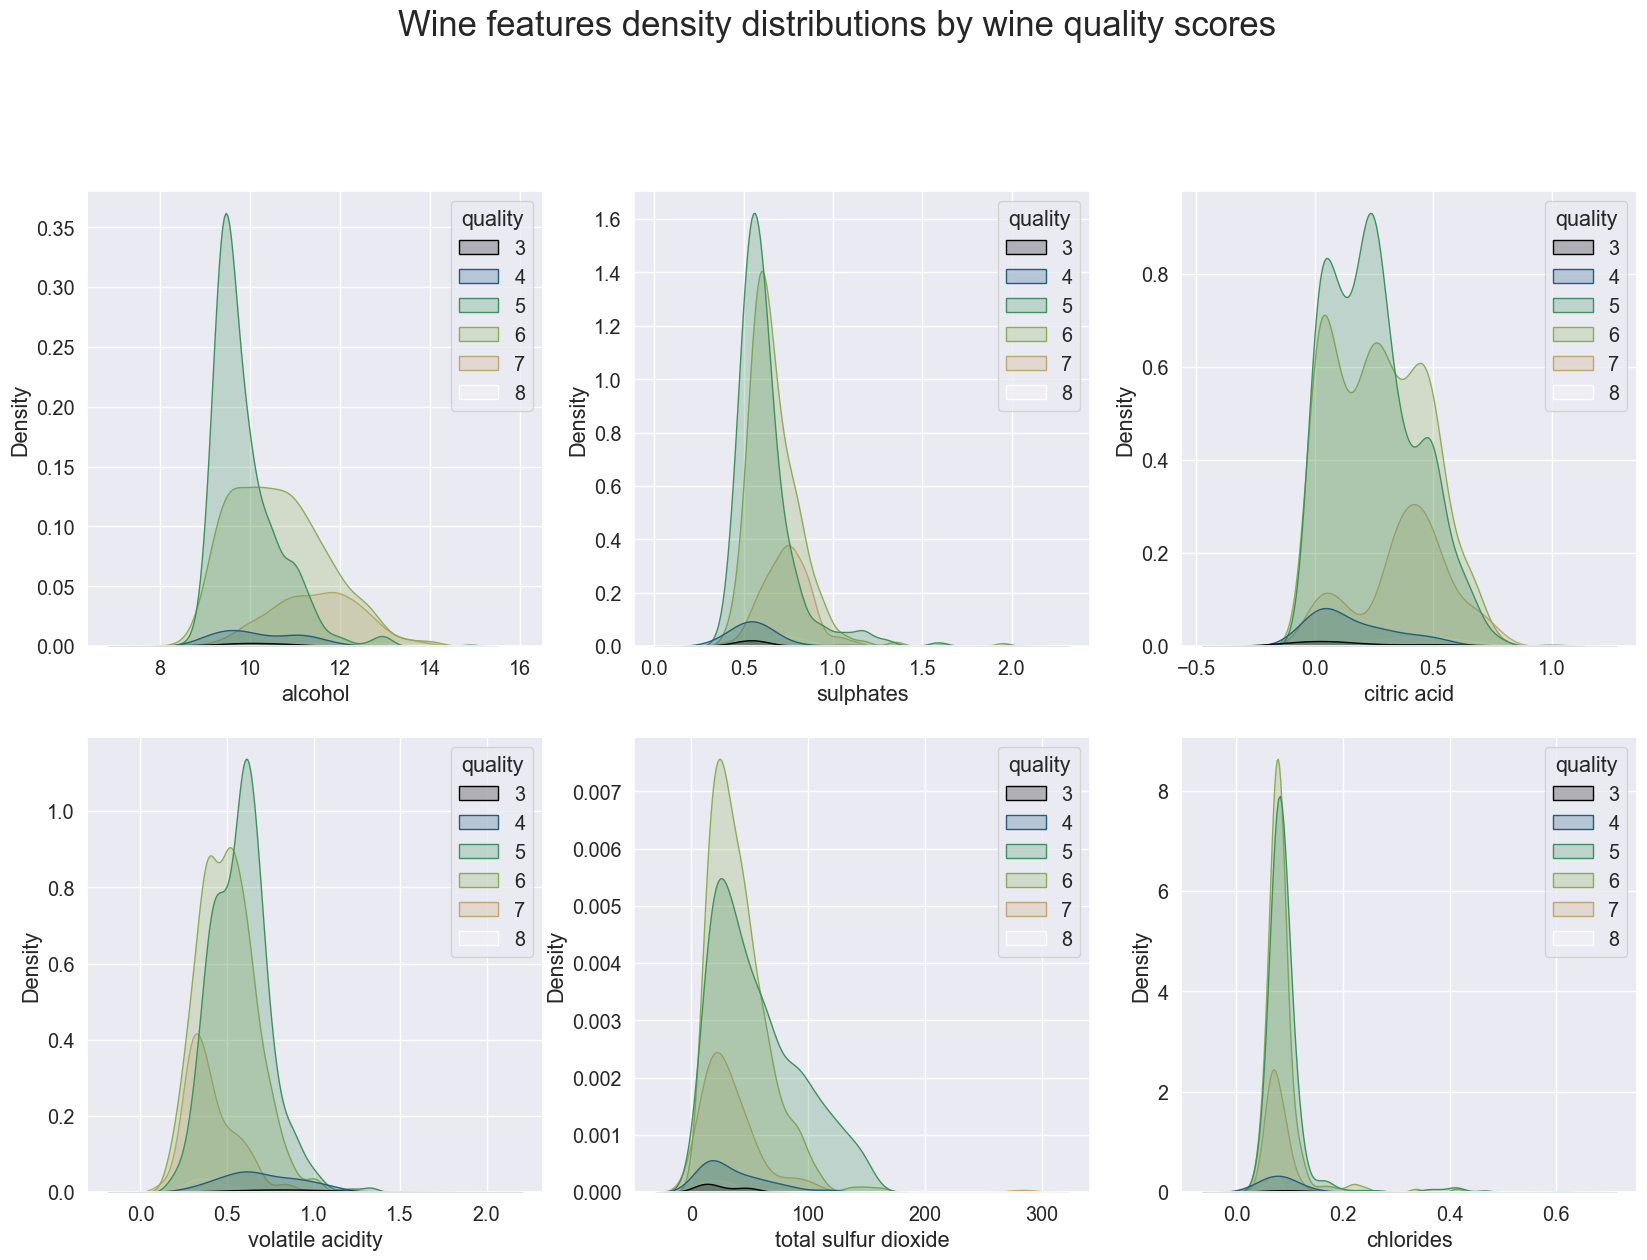

In [7]:
# Wine features distribution plots by wine quality score using Kernel density estimation (KDE)
fig, axes = plt.subplots(2, 3, figsize=(20,13))
fig.suptitle('Wine features density distributions by wine quality scores',fontsize=25, y=1.02)

sns.kdeplot(ax=axes[0, 0], data=gr8_wq, x="alcohol", hue="quality", fill=True, palette='gist_earth');
sns.kdeplot(ax=axes[0, 1], data=gr8_wq, x="sulphates", hue="quality", fill=True, palette='gist_earth');
sns.kdeplot(ax=axes[0, 2], data=gr8_wq, x="citric acid", hue="quality", fill=True, palette='gist_earth');
sns.kdeplot(ax=axes[1, 0], data=gr8_wq, x="volatile acidity", hue="quality", fill=True, palette='gist_earth');
sns.kdeplot(ax=axes[1, 1], data=gr8_wq, x="total sulfur dioxide", hue="quality", fill=True, palette='gist_earth');
sns.kdeplot(ax=axes[1, 2], data=gr8_wq, x="chlorides", hue="quality", fill=True, palette='gist_earth');



#### The distribution plots of above features reflect the same result as correlation heatmap: high quality wines have higher probability to have high level of Alcohol, Sulphates, Citric acid and Volatile acidity; low level of Total Sulfure dioxide. While low quality wines are in the opposite.

note that 2 = high quality, 1 = medium quality, 0 = low quality 

In [7]:
# #  Convert "Quality" into Low/Medium/High
# gr8_wq['quality_cat'] = np.select([gr8_wq.quality >=7, gr8_wq.quality>=5 , gr8_wq.quality< 5], 
#                    [2,1,0], 
#                    default=None)
# gr8_wq['quality_cat'] = gr8_wq['quality_cat'].astype('category',copy=False)

In [4]:
gr8_wq["quality"].value_counts() 
# Dataset is imbalanced meaning the number of records for each label is not evenly distributed.
# Also there are more 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
#  Convert "Quality" into Low/Medium/High
gr8_wq['quality_cat'] = np.select([
    gr8_wq.quality >=7,
    gr8_wq.quality==6 ,
    gr8_wq.quality<=5]
    , 
                   [2,1,0], 
                   default=None)
gr8_wq['quality_cat'] = gr8_wq['quality_cat'].astype('category',copy=False)

In [6]:
gr8_wq['quality_cat'].value_counts()

0    744
1    638
2    217
Name: quality_cat, dtype: int64

In [7]:
# keeping equal number of records for each category
dfs = []
n_rows = 217
for cat in gr8_wq["quality_cat"].unique():
    df_temp = gr8_wq[gr8_wq["quality_cat"] == cat].sample(n_rows)
    dfs.append(df_temp)
gr8_wq = pd.concat(dfs)

In [8]:
gr8_wq["quality_cat"].value_counts()

0    217
1    217
2    217
Name: quality_cat, dtype: int64

In [9]:
# # pairplot by quality category
# pp2 = sns.pairplot(gr8_wq, hue="quality_cat", diag_kind="hist")
# pp2.fig.suptitle("Pairplot", fontsize=30, y=1.02);

In [56]:
# # Wine features distribution plots by wine quality cateogries using Kernel density estimation (KDE)
# fig2, axes2 = plt.subplots(2, 3, figsize=(20,13))
# fig2.suptitle('Wine features density distributions by wine quality category',fontsize=25, y=1.02)

# sns.kdeplot(ax=axes2[0, 0], data=gr8_wq, x="alcohol", hue="quality_cat", fill=True, palette='gist_earth');
# sns.kdeplot(ax=axes2[0, 1], data=gr8_wq, x="sulphates", hue="quality_cat", fill=True, palette='gist_earth');
# sns.kdeplot(ax=axes2[0, 2], data=gr8_wq, x="citric acid", hue="quality_cat", fill=True, palette='gist_earth');
# sns.kdeplot(ax=axes2[1, 0], data=gr8_wq, x="volatile acidity", hue="quality_cat", fill=True, palette='gist_earth');
# sns.kdeplot(ax=axes2[1, 1], data=gr8_wq, x="total sulfur dioxide", hue="quality_cat", fill=True, palette='gist_earth');
# sns.kdeplot(ax=axes2[1, 2], data=gr8_wq, x="chlorides", hue="quality_cat", fill=True, palette='gist_earth');



### Second Section: Modeling

##### Split the Dataset

split out target variable

In [10]:

gr8_X = gr8_wq.drop(['quality_cat', "quality", "Predict_quality"], axis = 1)

gr8_y = gr8_wq['quality_cat']


In [11]:
gr8_X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1356            6.1             0.340         0.25             1.8      0.084   
962             6.6             0.570         0.02             2.1      0.115   
808             7.4             0.530         0.12             1.9      0.165   
629             7.6             0.685         0.23             2.3      0.111   
79              8.3             0.625         0.20             1.5      0.080   
...             ...               ...          ...             ...        ...   
407            12.0             0.390         0.66             3.0      0.093   
1398            7.0             0.600         0.12             2.2      0.083   
488            11.6             0.320         0.55             2.8      0.081   
1408            8.1             0.290         0.36             2.2      0.048   
1067           11.1             0.310         0.53             2.2      0.060   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1356                  4.0                  28.0  0.99464  3.36       0.44   
962                   6.0                  16.0  0.99654  3.38       0.69   
808                   4.0                  12.0  0.99702  3.26       0.86   
629                  20.0                  84.0  0.99640  3.21       0.61   
79                   27.0                 119.0  0.99720  3.16       1.12   
...                   ...                   ...      ...   ...        ...   
407                  12.0                  30.0  0.99960  3.18       0.63   
1398                 13.0                  28.0  0.99660  3.52       0.62   
488                  35.0                  67.0  1.00020  3.32       0.92   
1408                 35.0                  53.0  0.99500  3.27       1.01   
1067                  3.0                  10.0  0.99572  3.02       0.83   

      alcohol  
1356     10.1  
962       9.5  
808       9.2  
629       9.3  
79        9.1  
...       ...  
407      10.8  
1398     10.2  
488      10.8  
1408     12.4  
1067     10.9  

[651 rows x 11 columns]

In [12]:
gr8_y

1356    0
962     0
808     0
629     0
79      0
       ..
407     2
1398    2
488     2
1408    2
1067    2
Name: quality_cat, Length: 651, dtype: category
Categories (3, int64): [0, 1, 2]

split out train test dataset

In [13]:
gr8_X_train, gr8_X_test, gr8_y_train, gr8_y_test = train_test_split(gr8_X, gr8_y, stratify=gr8_y,test_size=0.20)

Note: Due to the small amount of High quality and low quality (8 & 3), the train test split is performed with stratify split instead of random split to ensure there are samiliar percentage of those minor labels in the test dataset

##### Baseline model


Get the baseline model accuracy

Note: The baseline model we chose is logistic regression, no tuning performed

In [14]:
# Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Initializing the LogisticRegression Model
model = LogisticRegression()

# Training the model
model.fit(gr8_X_train, gr8_y_train)

# Making predictions on the datatest
gr8_y_pred = model.predict(gr8_X_test)

# Getting the score

LogisticRegression_score = model.score(gr8_X_test, gr8_y_test)
print("The accuracy is:", LogisticRegression_score)

The accuracy is: 0.648854961832061


Model coefficient

In [15]:
# coefficient = model.coef_

In [16]:
# coefficient_df = pd.DataFrame(coefficient, index = model.classes_, columns = gr8_X_train.columns)
# coefficient_df.index.name = "quality"
# coefficient_df

Coefficient visualization

<AxesSubplot: >

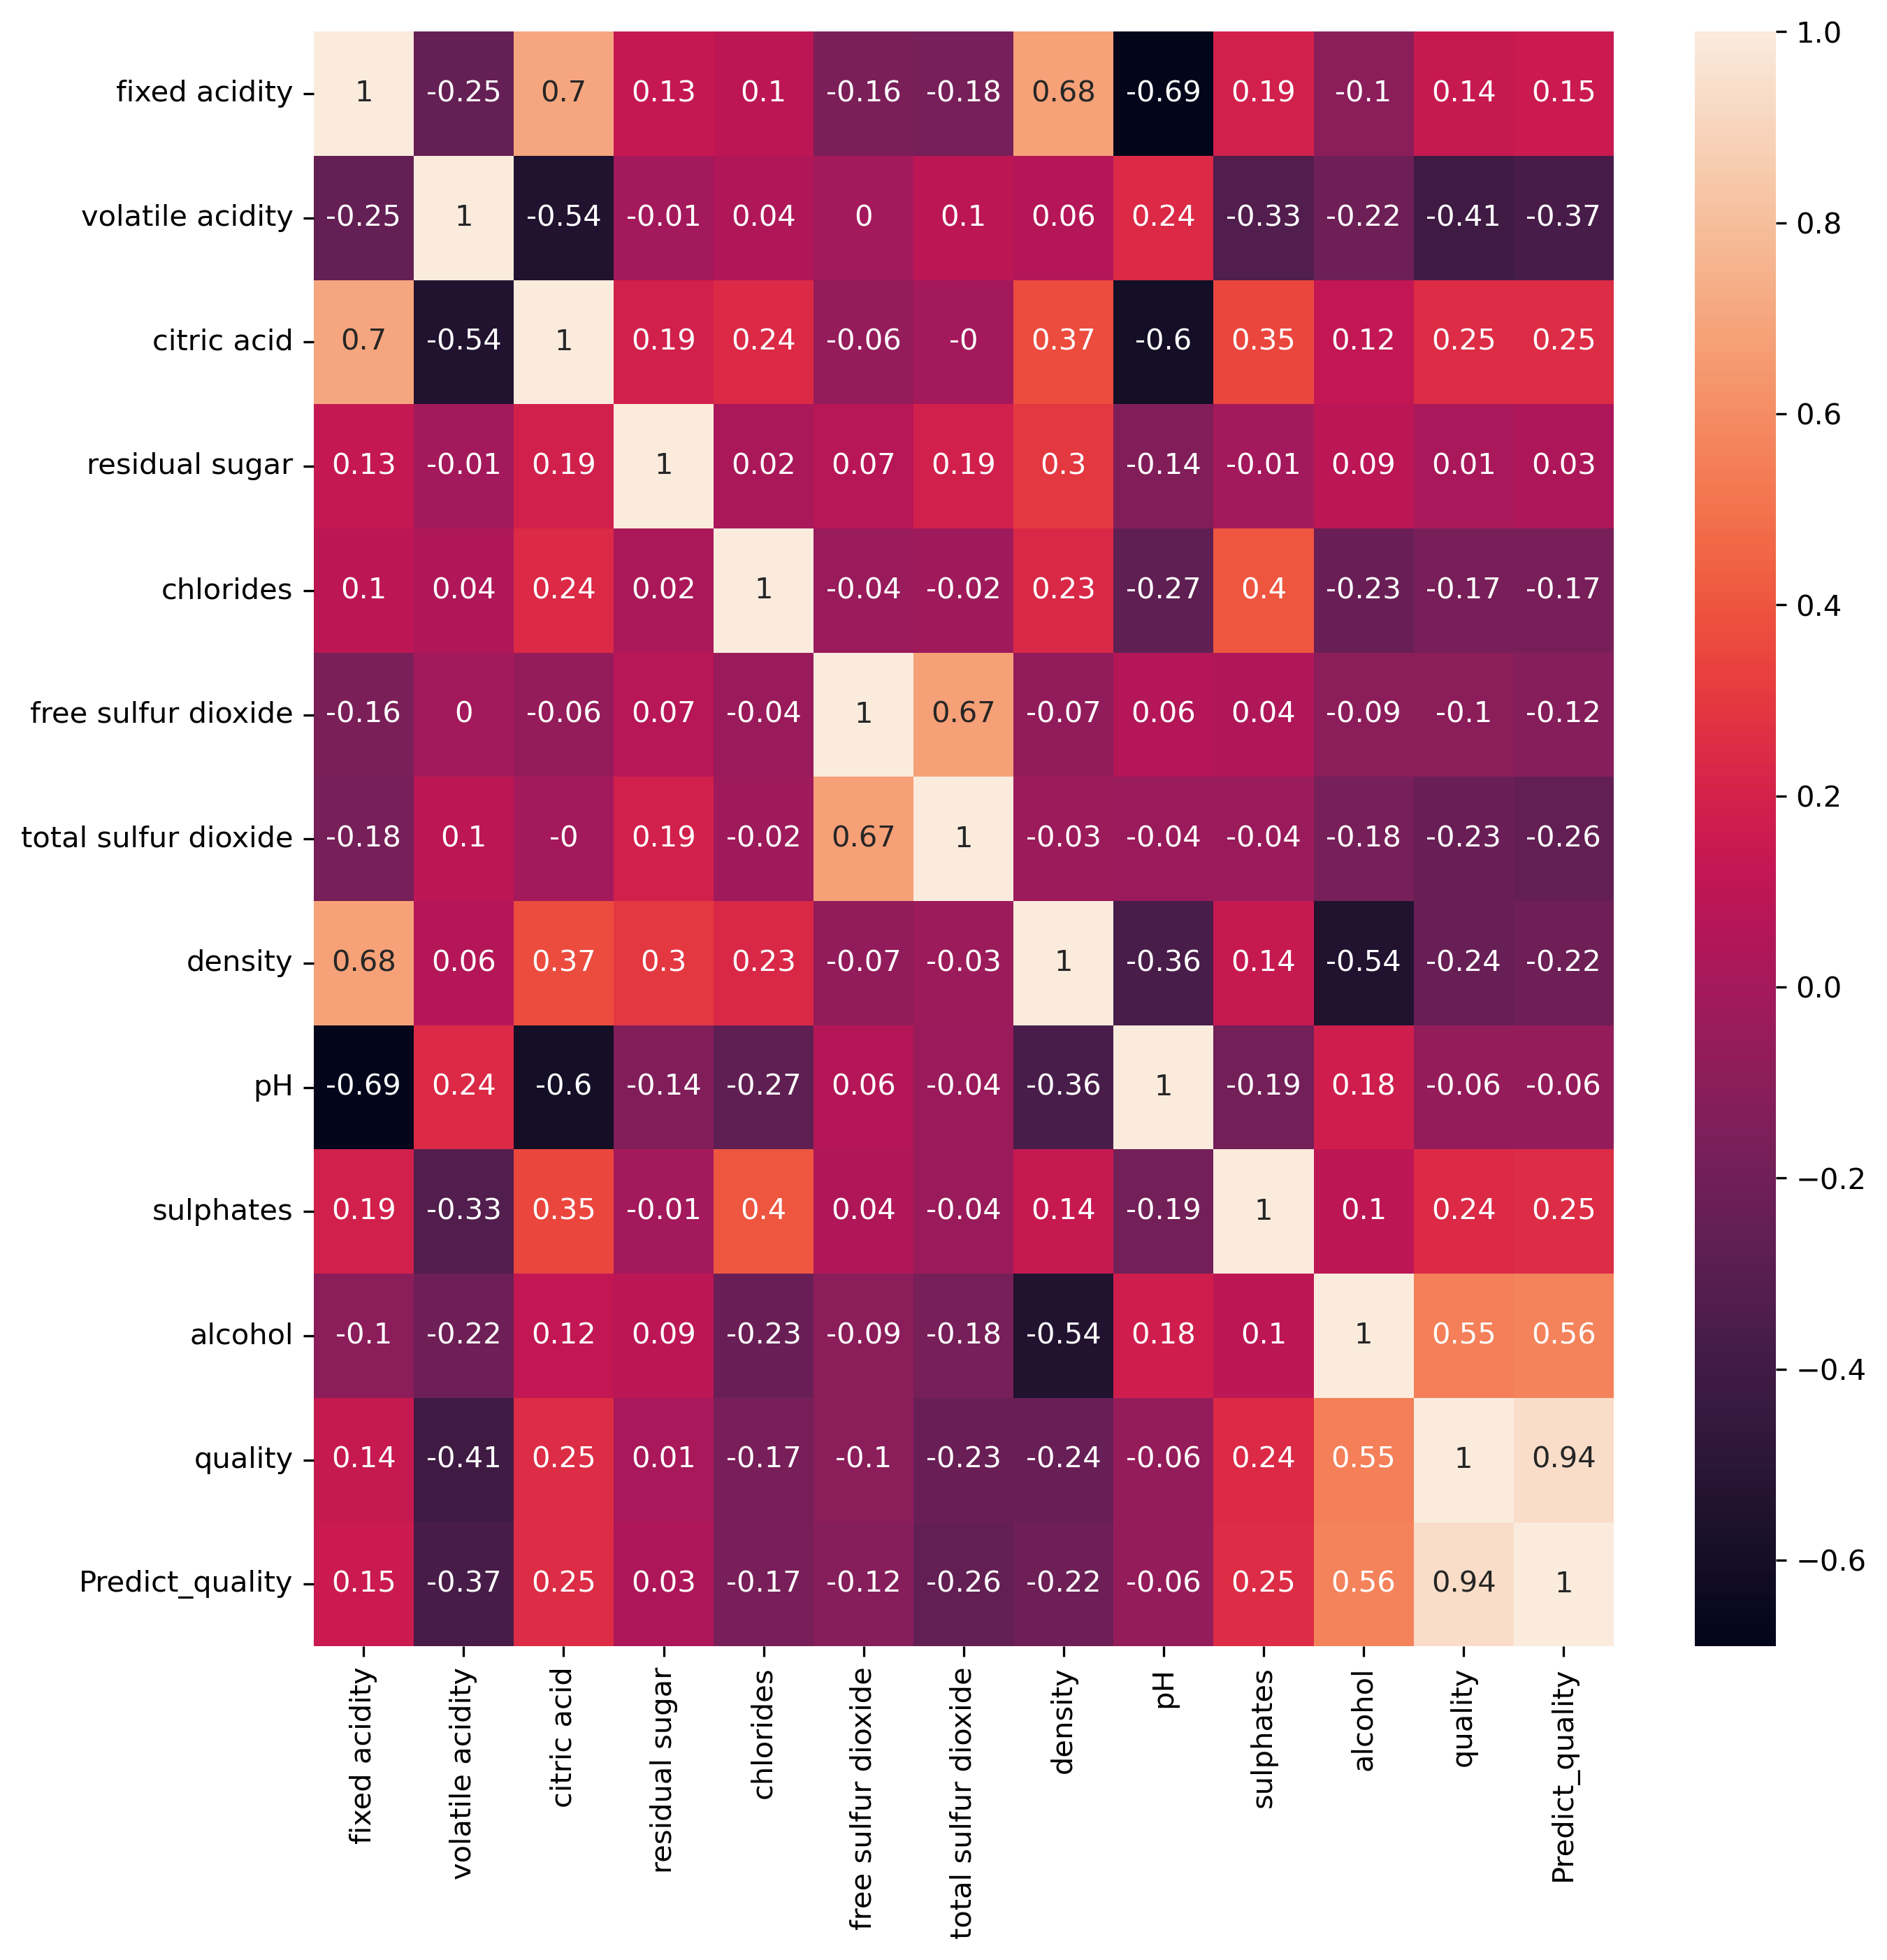

In [17]:
plt.figure(figsize=(10, 10),dpi=300)
correlation_matrix = gr8_wq.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
#plt.savefig('/Users/Ahmed/Documents/Dsan6700/heatmap.jpg',dpi=300)

##### Evaluate base models

Test performance of base models

Note: Due to the new version of the XGBoost model's issue, y_train must be encoded.

In [18]:
# #encode y_train
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)

In [19]:
# list of models
def base_models():
    models = dict()
    models['LogisticRegression'] = LogisticRegression()
    models["KNeighborsClassifier"] = KNeighborsClassifier()
    models["SVC"] = svm.SVC()
    models["DecisionTreeClassifier"] = DecisionTreeClassifier()
    models["RandomForestClassifier"] = RandomForestClassifier()
    models["BaggingClassifier"] = BaggingClassifier()
    models["GradientBoostingClassifier"] = GradientBoostingClassifier()
    models["GaussianNB"] = GaussianNB()
    # models["XGB"] = XGBClassifier()
    return models

In [20]:
# Function to evaluate the list of models
def eval_models(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, gr8_X_train, gr8_y_train, scoring="f1_macro", cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [21]:
# evaluate the models and print results
models = base_models()
results, names = list(), list() 
for name, model in models.items():
    scores = eval_models(model)
    results.append(scores)
    names.append(name)
#     print(f"{model}: {scores.mean()}")
#     print('>%s %.2f (%.2f)' % (name, scores.mean(), scores.std()))
    print('> %s: %.2f' % (name, scores.mean()))
    

# store results in dataframe
classmod = pd.DataFrame(np.transpose(results), columns = models.keys())
classmod = pd.melt(classmod.reset_index(), id_vars='index',value_vars=models.keys())

> LogisticRegression: 0.60
> KNeighborsClassifier: 0.47
> SVC: 0.44
> DecisionTreeClassifier: 0.58
> RandomForestClassifier: 0.64
> BaggingClassifier: 0.62
> GradientBoostingClassifier: 0.65
> GaussianNB: 0.56


In [22]:
# Top 5 models
classmod.sort_values(by = "value", ascending= False).head(5)

index                    variable     value
182      2  GradientBoostingClassifier  0.778033
192     12  GradientBoostingClassifier  0.754902
201     21  GradientBoostingClassifier  0.743231
203     23  GradientBoostingClassifier  0.743122
220     10                  GaussianNB  0.737071

In [23]:
# Creating a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier on the training data
rf_classifier.fit(gr8_X_test, gr8_y_test)

# Making predictions on the test data
y_pred = rf_classifier.predict(gr8_X_test)
print(classification_report(gr8_y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        43

    accuracy                           1.00       131
   macro avg       1.00      1.00      1.00       131
weighted avg       1.00      1.00      1.00       131



### Feature Importance table

In [24]:
# Getting the feature importance
feature_importances = rf_classifier.feature_importances_

# Listing the feature names
feature_names = gr8_X_train.columns

# Creating a feature importance table
importance_table = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

feature_imp_df = pd.DataFrame(importance_table, columns = ["Feature", "Importance"])
feature_imp_df["Importance"] = feature_imp_df["Importance"].apply(lambda x : round(x,2))
feature_imp_df

Feature  Importance
0                alcohol        0.17
1       volatile acidity        0.16
2              sulphates        0.11
3            citric acid        0.10
4                density        0.08
5   total sulfur dioxide        0.08
6              chlorides        0.08
7                     pH        0.06
8          fixed acidity        0.06
9         residual sugar        0.06
10   free sulfur dioxide        0.06

In [26]:
pickle.dump(
    rf_classifier,
    open(
        file = "model.sav",
        mode = "wb"
        )
)

In [ ]:
rf_classifier

Visualize base models' performance

In [27]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = px.box(classmod, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": "RMS Error"
        },title="Model Performance")
fig.show()

### Build and apply Stack model base on the performance of base models

Select base models to stacking model

Note that the base models with best performance are Random Forest, Bagging and GBM

In [28]:
def get_stacking():
# define the base models
    level0 = list()
    level0.append(('Bagging', BaggingClassifier()))
    level0.append(('RF', RandomForestClassifier()))
    level0.append(('GBM', GradientBoostingClassifier()))
# define meta learner model
    level1 = LogisticRegression()
# define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model
def base_models():
    models = dict()
    models["Bagging"] = BaggingClassifier()
    models["Random Forest"] = RandomForestClassifier()
    models["GBM"] = GradientBoostingClassifier()
    models["Stacked Model"] = get_stacking()
    return models

New models evaluation

In [29]:
# Execute and save stacked & base models results
def eval_models(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = -cross_val_score(model, gr8_X_train, gr8_y_train,
    scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1,
    error_score='raise')
    return scores
models = base_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = eval_models(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
classmod = pd.DataFrame(np.transpose(results), columns = ["Bagging","Random Forest","GBM","Stacked Model"])
classmod = pd.melt(classmod.reset_index(),
id_vars='index',value_vars=["Bagging","Random Forest","GBM","Stacked Model"])


>Bagging 0.378 (0.069)
>Random Forest 0.340 (0.050)
>GBM 0.338 (0.059)
>Stacked Model 0.335 (0.057)


In [31]:
# graph boxplot to show the RMSE
fig = px.box(classmod, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model","value": "RMS Error"},title="Model Performance")
fig.show()
# fig.write_image("Project/Boxplot-candidate.jpeg",engine="kaleido",format="png",width=1600, height=700, scale=0.75)fig.show()

### Export Pickle model and use the model to predict y_test from x_test

In [32]:
# Build and fit the model
gr8_y_train = gr8_y_train.ravel()
level0 = list()
level0.append(('Bagging', BaggingClassifier()))
level0.append(('RF', RandomForestClassifier()))
level0.append(('GBM', GradientBoostingClassifier()))
level1 = LogisticRegression()
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
model.fit(gr8_X_train, gr8_y_train)

    

StackingClassifier(cv=5,
                   estimators=[('Bagging', BaggingClassifier()),
                               ('RF', RandomForestClassifier()),
                               ('GBM', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [33]:
#Save to model as picle file in the current working directory
pkl_filename = "AssignmentPickle.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)
# Load the model from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)


In [37]:
#Save to model as picle file in the current working directory
pkl_filename = "C:/Users/ahmed/Downloads/AssignmentTutorial/app/TrainedModel/StackedPickle.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)
# Load the model from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)


In [38]:
#import model and predict using y_test
score = pickle_model.score(gr8_X_test, gr8_y_test)
print("Test score: {0:.2f} %".format(100 * score))
gr8_Y_predict = pickle_model.predict(gr8_X_test)

Test score: 69.47 %


Get the confusion matrix

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
predictions = pd.DataFrame(gr8_Y_predict, columns=['predictions'])
predictions['actual'] = gr8_y_test
print(f'The confusion matrix for the model is: \n {confusion_matrix( gr8_y_test, gr8_Y_predict.ravel())}')

#Print the confusion matrix below

The confusion matrix for the model is: 
 [[24 18  2]
 [ 3 26 14]
 [ 1  2 41]]


Visualize the confusion matrix

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from seaborn import set_palette

plt.figure(figsize=(2.5,2.5),dpi=75)
set_palette("Paired")

G8_conf_matrix = confusion_matrix(gr8_y_test, gr8_Y_predict)
#ConfusionMatrixDisplay.from_estimator(pickle_model, gr8_X_test, gr8_y_test)

<Figure size 187.5x187.5 with 0 Axes>

Add predicted value to the original dataset

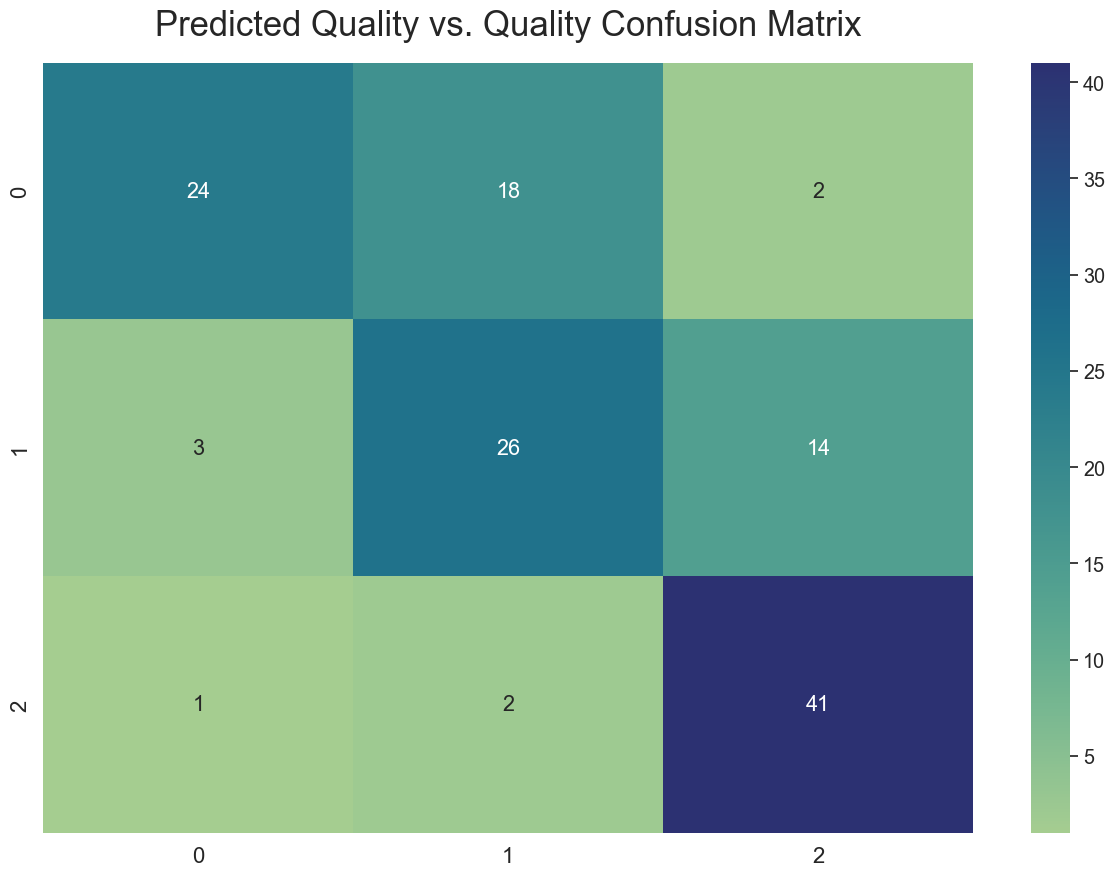

In [41]:
# graph confusion matrix
# plot correltion heatmap
plt.figure(figsize = (15,10))

plt.title("Predicted Quality vs. Quality Confusion Matrix", fontsize=25, pad=20)

sns.set(font_scale=1.3)
cm = sns.heatmap(G8_conf_matrix, annot=True,fmt='.0f', cmap='crest')
cm.set_yticklabels(cm.get_ymajorticklabels(), fontsize = 16);
cm.set_xticklabels(cm.get_xmajorticklabels(), fontsize = 16);


In [64]:
# predict with the saved pickle model
gr8_wq['Predict_quality'] = pickle_model.predict(gr8_X)
# export dataframe as csv file
gr8_wq.to_csv('gr8_wq_quality.csv',index=False)

## Third Section: Initial deployment